
avg C_vec     : 0.95
avg C_cs      : 0.77
avg E_n_prime : 0.54
avg E_m_prime : 0.04
avg eps       : 1.07
avg l2_err    : 0.31



/home/usr/workspace/ar_nlfff_piml/rtmag/test/post.py:85: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 3.
  plt.tight_layout()
/home/usr/workspace/ar_nlfff_piml/rtmag/test/post.py:86: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 3.
  plt.savefig(result_path / 'energy.png', dpi=600)
/home/usr/workspace/ar_nlfff_piml/rtmag/test/post.py:125: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 3.
  plt.tight_layout()
/home/usr/workspace/ar_nlfff_piml/rtmag/test/post.py:126: UserWarning: AutoDateLocator was unable to pick an appropriate interval

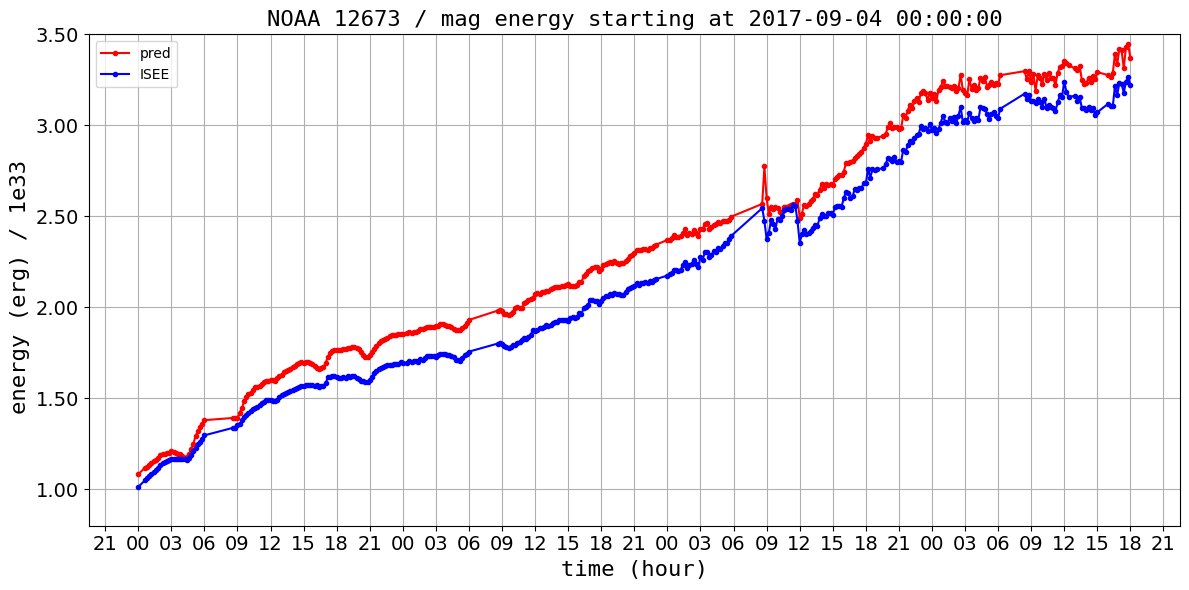

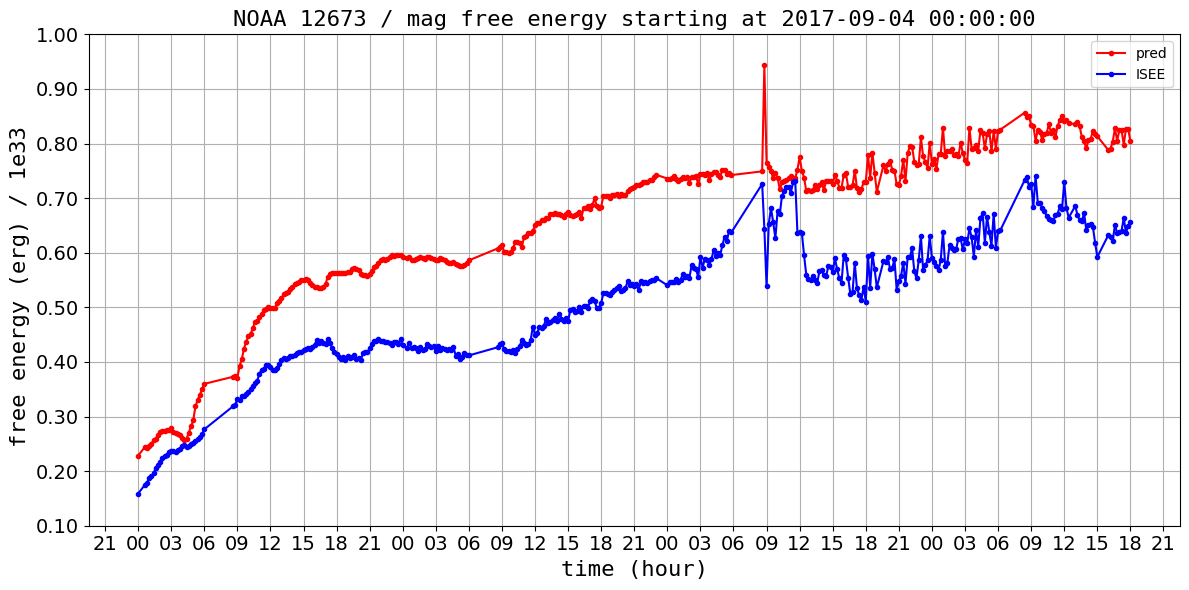

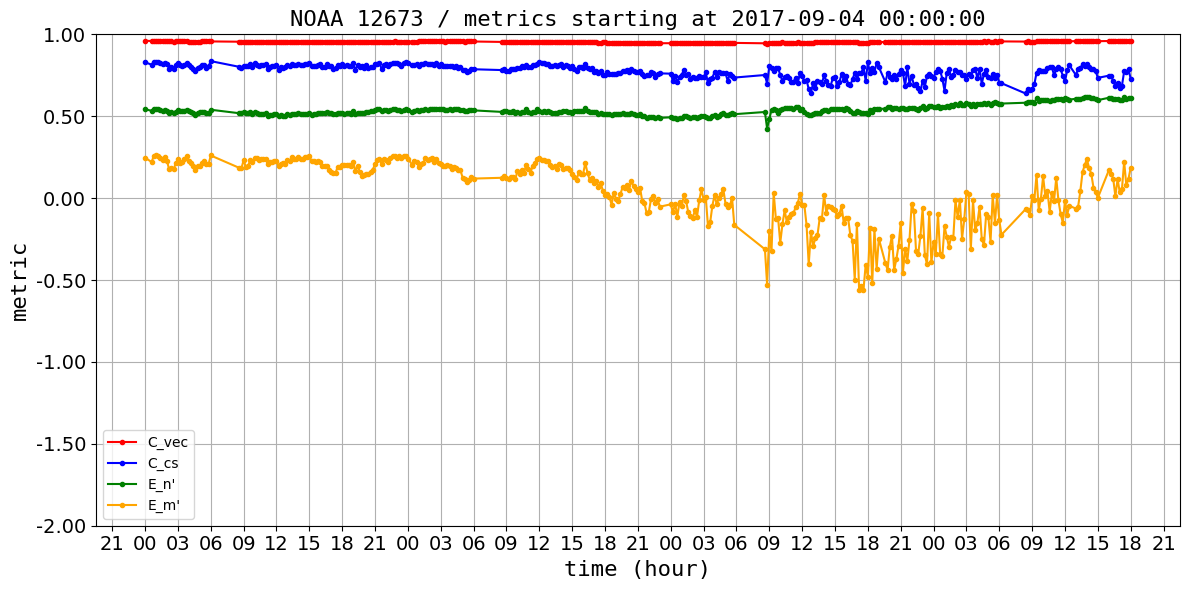

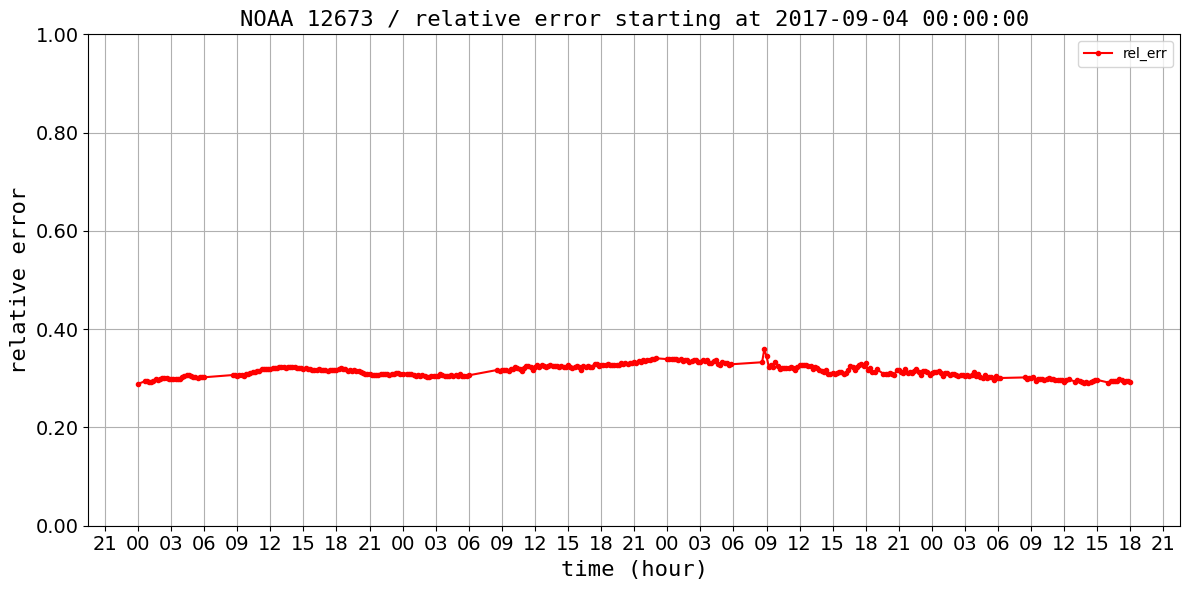

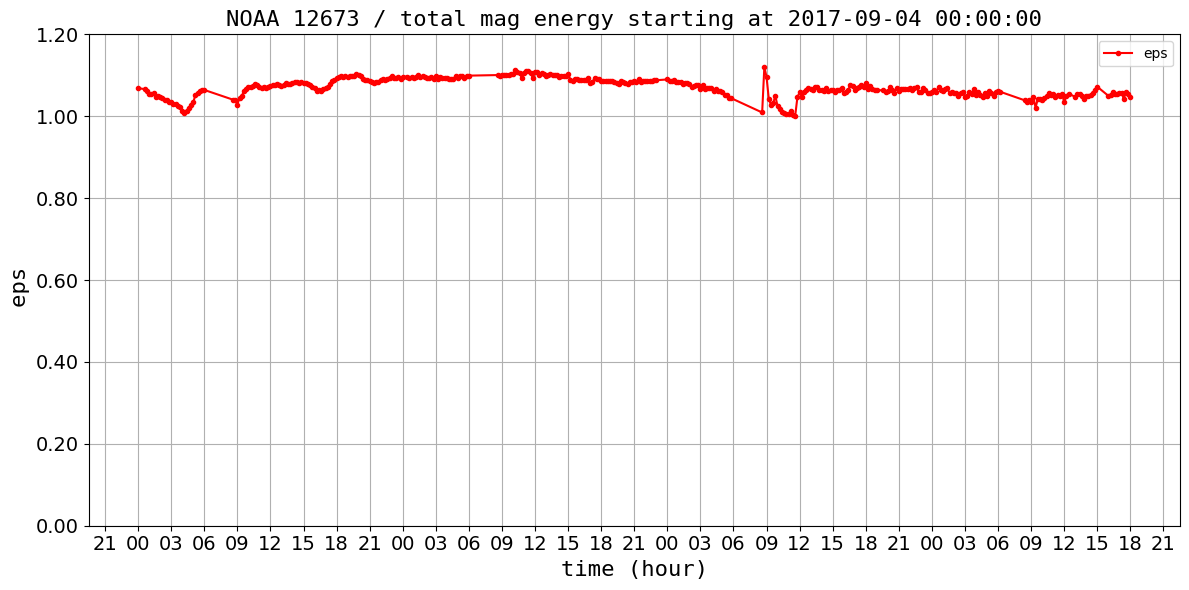

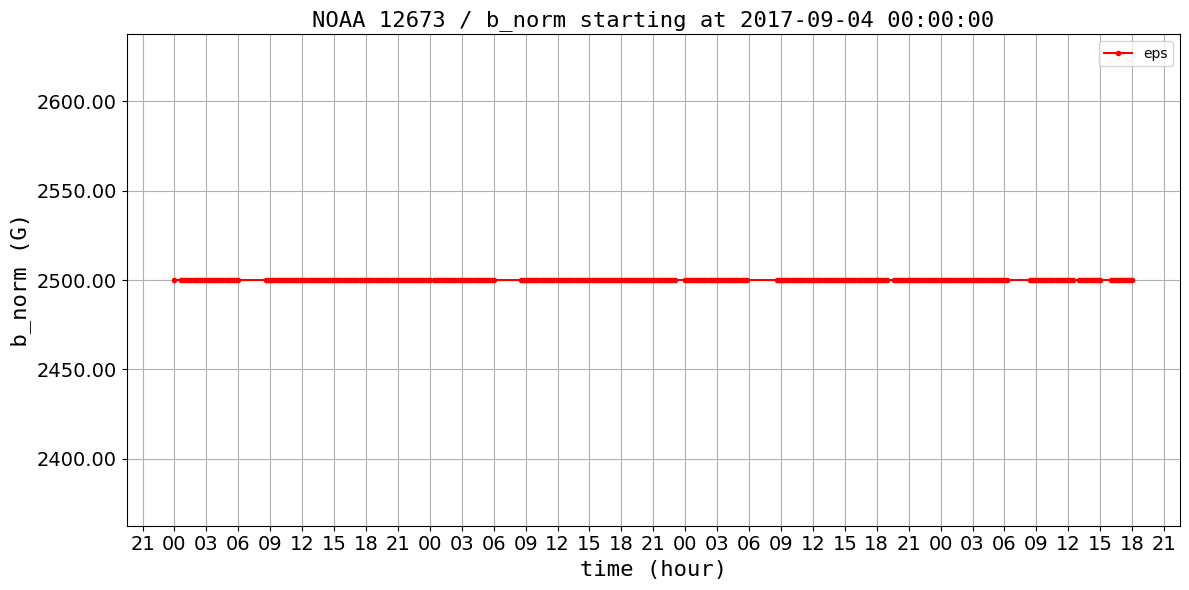

In [1]:
import pandas as pd
import json
import argparse
from pathlib import Path

from rtmag.test.post import Metrics

configs = argparse.Namespace()

with open("/home/usr/workspace/ar_nlfff_piml/configs/test/uno_pi_cc_hnorm_unit_aug_12673.json") as config:
    info = json.load(config)
    for key, value in info.items():
        configs.__dict__[key] = value


result_path = Path(configs.result_path)

result_csv = result_path / "real_time.csv"

f = pd.read_csv(result_csv)
m = Metrics(f,
            title=configs.metrics["title"],
            energy_ylim=configs.metrics["energy_ylim"],
            free_energy_ylim=configs.metrics["free_energy_ylim"],
            metrics_ylim=configs.metrics["metrics_ylim"],
            error_ylim=configs.metrics["error_ylim"],
            eps_ylim=configs.metrics["eps_ylim"],
            hour=configs.metrics["hour"])
m.print()

with open(result_path / "metrics.txt", "w") as f:
    df = m.df
    eps_mean = m.eps.mean()
    c_vec_mean = df['C_vec'].mean()
    c_cs_mean = df['C_cs'].mean()
    e_n_mean = df["E_n_prime"].mean()
    e_m_mean = df["E_m_prime"].mean()
    l2_err_mean = df['l2_err'].mean()
    f.write(f"avg C_vec        : {c_vec_mean:.2f}\n")
    f.write(f"avg C_cs         : {c_cs_mean:.2f}\n")
    f.write(f"avg E_n_prime    : {e_n_mean:.2f}\n")
    f.write(f"avg E_m_prime    : {e_m_mean:.2f}\n")
    f.write(f"avg eps          : {eps_mean:.2f}\n")
    f.write(f"avg l2_err       : {l2_err_mean:.2f}\n")

m.plot(result_path)

In [2]:
import numpy as np

In [4]:
with open("/home/usr/workspace/ar_nlfff_piml/configs/test/uno_pi_cc_hnorm_1_unit_aug_ccc_square_12673.json") as config:
    info = json.load(config)
    for key, value in info.items():
        configs.__dict__[key] = value


result_path = Path(configs.result_path)

result_csv = result_path / "real_time.csv"

f = pd.read_csv(result_csv)
m = Metrics(f,
            title=configs.metrics["title"],
            energy_ylim=configs.metrics["energy_ylim"],
            free_energy_ylim=configs.metrics["free_energy_ylim"],
            metrics_ylim=configs.metrics["metrics_ylim"],
            error_ylim=configs.metrics["error_ylim"],
            eps_ylim=configs.metrics["eps_ylim"],
            hour=configs.metrics["hour"])
dff = m.df

<Axes: >

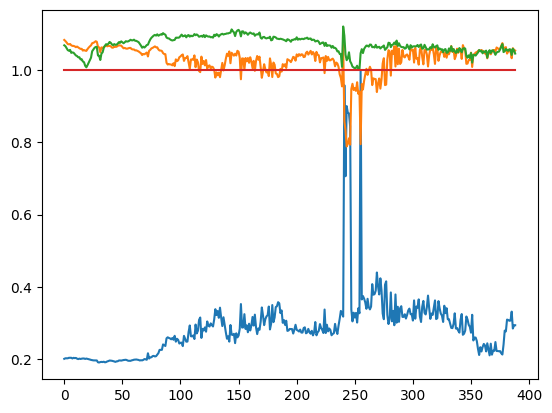

In [10]:
(dff['b_norm']/np.max(dff['b_norm'])).plot()
dff['eps'].plot()
df['eps'].plot()
(df['b_norm']/2500).plot()

In [8]:
dff['eps'].mean()

1.0297585490643204

In [9]:
df['eps'].mean()

1.0704959652693984